## How often are NYTimes Journalists writing?

IMPORTANT:
- You should download the notebook and dataset. **Ed will likely crash**.


## Task 1

How often do journalists write in a given year, given our data?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("nytimes_metadata.csv")

In [6]:
df.sample(4)

,headline,word_count,author_count,lead_author,section,pub_date
6659,"75 Years After World War II Theft, a Painting ...",682.0,1,E l i s a b e t t a P o v o l e d o,Arts,2019-07-19T17:36:41+0000
48782,America Is Done Waiting for the Mueller Report,882.0,1,J e r r o l d L . N a d l e r,Opinion,2019-04-01T10:00:05+0000
30432,You Make the Call: Leaving Williamsburg for Be...,0.0,1,J o y c e C o h e n,Real Estate,2019-05-30T09:00:04+0000
28974,Exploring the Soul of the South,971.0,1,J o h n,Books,2019-05-20T09:00:04+0000


In [8]:
# Clean up the data a bit
df['lead_author'] = df.lead_author.apply(lambda x: str(x).replace(" ", ""))

In [9]:
df.head(3)

,headline,word_count,author_count,lead_author,section,pub_date
0,A Leak-Prone White House Finally Manages to Ke...,1341.0,1,MichaelCrowley,U.S.,2019-12-01T00:15:08+0000
1,Justin Fields Has ‘Heisman Moment’ in Ohio Sta...,727.0,1,JeffArnold,Sports,2019-12-01T00:33:57+0000
2,Mikaela Shiffrin Learns a New Way to Win: With...,762.0,1,BillPennington,Sports,2019-12-01T00:37:15+0000


In [82]:
gdf = df.groupby("lead_author")

In [83]:
pub_durations = []
for auth in gdf.groups:
    sdf = gdf.get_group(auth)
    #if sdf.shape[0] == 1:
    #    continue
    sdf = sdf.sort_values("pub_date")
    pub_dates = sdf.pub_date.tolist()
    times = [dt.datetime.strptime(date, "%Y-%m-%dT%H:%M:%S%z") for date in pub_dates]
    time_diffs = np.diff(times)
    seconds_btw = [td.total_seconds() for td in time_diffs]
    pub_durations.append(np.mean(seconds_btw) / 60 / 60 / 24)

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:ylabel='Count'>

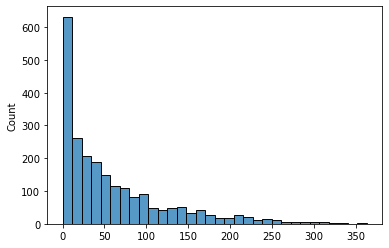

In [84]:
import seaborn as sns
sns.histplot(pub_durations)

In [91]:
np.nanpercentile(pub_durations, [25, 50, 75])

array([10.02941702, 36.14468416, 87.02772859])

### It seems to take just over a month to publish an article